# Poker Card detection baseline with Roboflow

## Training

See [Roboflow Yolov8 Doc](https://github.com/ultralytics/ultralytics). Done on Colab

In [4]:
!pip install ultralytics

  Using cached ultralytics-8.0.96-py3-none-any.whl (566 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)
  Using cached pandas-2.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached Pillow-9.5.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Using cached sentry_sdk-1.22.2-py2.py3-none-any.whl (203 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached torchvision-0.15.2-cp310-cp310-manylinux1_x86_64.whl (6.0 MB)
  Using cached kiwisolver-1.4.4-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached fonttools-4.39.3-py3-none-any.whl (1

In [ ]:
!wget -nc https://storage.googleapis.com/pipat-public-temp-storage/roboflow-poker.zip
!unzip roboflow-poker.zip -d poker-dataset/

In [3]:
# Move data
!mkdir datasets
!cp -r poker-dataset datasets

In [4]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt') # Smallest model
model.train(data="poker-dataset/data.yaml", epochs=50) # Train
metric = model.val()

100%|██████████| 6.23M/6.23M [00:00<00:00, 146MB/s]
Ultralytics YOLOv8.0.96 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=poker-dataset/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, 

In [7]:
result = model('./card-on-desk.jpg')


image 1/1 /content/card-on-desk.jpg: 640x480 1 10 Diamonds, 1 2 Hearts, 1 7 Spades, 1 9 Hearts, 57.0ms
Speed: 4.2ms preprocess, 57.0ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)


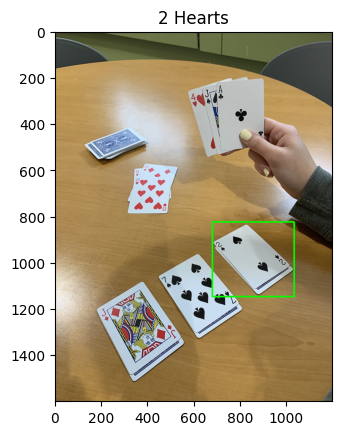

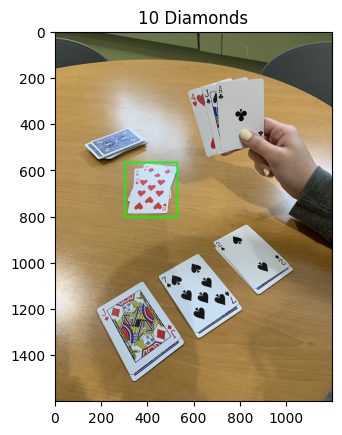

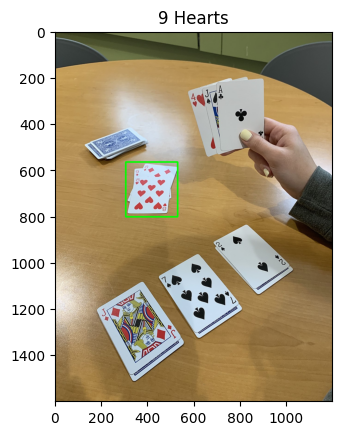

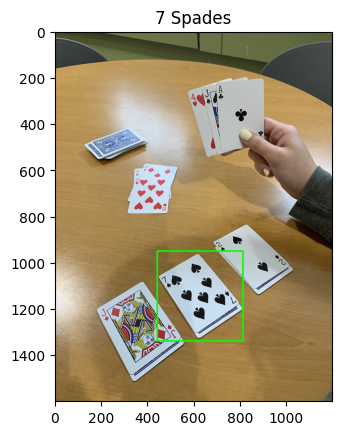

In [8]:
import matplotlib.pyplot as plt
import cv2 as cv
import torch

img = cv.imread('./card-on-desk.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

for r in result:
    box = r.boxes
    coord = box.xyxy.cpu().numpy().astype('int')
    # print(boxes.xyxy)
    # print(r.probs)
    for i, coo in enumerate(coord):
      plt.figure()
      imgc = img.copy()
      cv.rectangle(imgc, coo[0:2], coo[2:4], [0, 255, 0], 5)
      plt.title(r.names[box.cls[i].item()])
      plt.imshow(imgc)

In [6]:
# Export model
model.export()

Ultralytics YOLOv8.0.96 🚀 Python-3.10.11 torch-2.0.0+cu118 CPU

PyTorch: starting from runs/detect/train/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 57, 8400) (6.0 MB)

TorchScript: starting export with torch 2.0.0+cu118...
TorchScript: export success ✅ 4.9s, saved as runs/detect/train/weights/best.torchscript (11.9 MB)

Export complete (5.4s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=640 data=poker-dataset/data.yaml 
Visualize:       https://netron.app


'runs/detect/train/weights/best.torchscript'

# Inference

grab the weight from [my bucket](https://storage.googleapis.com/pipat-public-temp-storage/yolov8n-50epoch-robopoker.pt)


image 1/1 /home/pipat/ScratchPad/CompVision/Card-detection/assets/sample/card-on-desk.jpg: 640x480 1 10 Diamonds, 1 2 Hearts, 1 7 Spades, 1 9 Hearts, 133.9ms
Speed: 3.0ms preprocess, 133.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


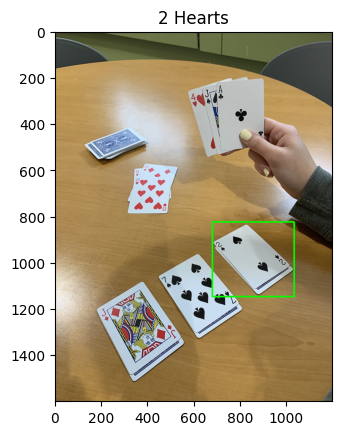

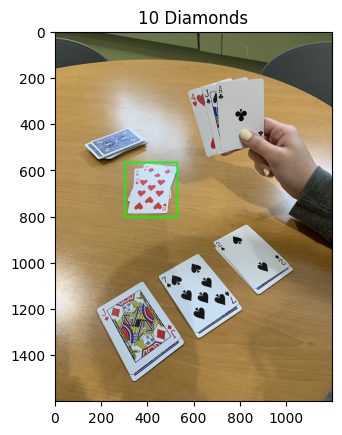

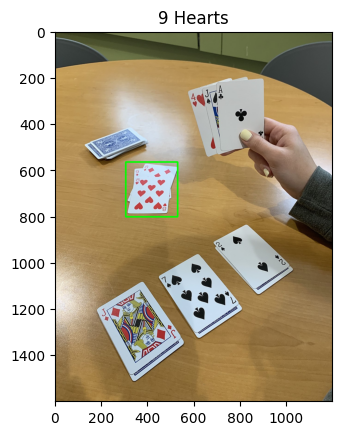

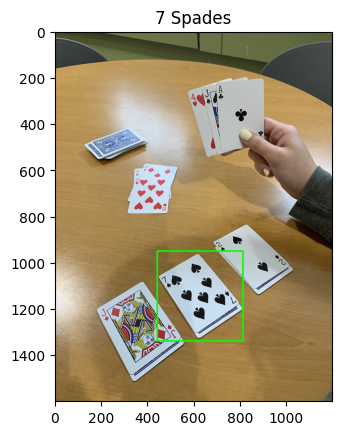

In [2]:
from ultralytics import YOLO

model = YOLO('../assets/weights/yolov8n-50epoch-robopoker.pt')
result = model('../assets/sample/card-on-desk.jpg')

import matplotlib.pyplot as plt
import cv2 as cv
import torch

img = cv.imread('../assets/sample/card-on-desk.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

for r in result:
    box = r.boxes
    coord = box.xyxy.cpu().numpy().astype('int')
    # print(boxes.xyxy)
    # print(r.probs)
    for i, coo in enumerate(coord):
      plt.figure()
      imgc = img.copy()
      cv.rectangle(imgc, coo[0:2], coo[2:4], [0, 255, 0], 5)
      plt.title(r.names[box.cls[i].item()])
      plt.imshow(imgc)